# Hypothesis Testing for Brain Data of Males and Females
This notebook is inspired from [this tutorial](https://www.scipy-lectures.org/packages/statistics/index.html)

**About the data** - The data has several features - gender, mean intelligence quotients including full-scale IQ (FSIQ), verbal IQ (VIQ), performance IQ (PIQ), weight, height, and MRI count.

**Problem Statement** - We want to test if gender has something to do with IQ

## Importing libraries

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

from pandas.tools import plotting

In [190]:
# Loading data
data = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")

In [191]:
# Data explorations
data.groupby('Gender').mean()

Unnamed: 0   FSIQ     VIQ     PIQ      Weight     Height  MRI_Count
Gender                                                                     
Female       19.65  111.9  109.45  110.45  137.200000  65.765000   862654.6
Male         21.35  115.0  115.25  111.60  166.444444  71.431579   954855.4

The average of values are somewhat different, and we want to drill into this data to find out if we can say for certain if Gender plays a role

Female         Axes(0.1,0.15;0.363636x0.75)
Male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

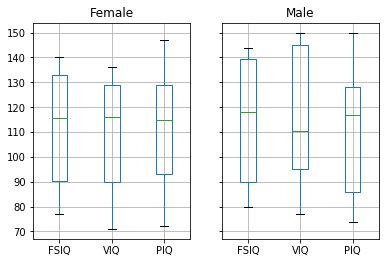

In [192]:
data.groupby('Gender').boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

**Observation** - From the box plot we see that the data is fairly well-behaved. The box plot has not identified outliers (which are 1.5.(Q3-Q1 or inter-quartile range) from either Q1 or Q3), therefore we cannot see points beyond whiskers.

In [193]:
# What's the current gender ratio?
print("Number of males in the study = %d" 
      %(len(data[data['Gender'] == 'Male'])))
print("Number of females in the study = %d" 
      %(len(data[data['Gender'] == 'Female'])))

Number of males in the study = 20
Number of females in the study = 20


## Data Exploration
### Univariate and bivariate analysis

/Users/jimpfaendtner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a206585c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f1a72b0>]], dtype=object)

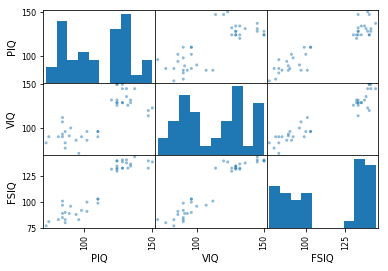

In [194]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])   

In [195]:
female_data = data[data['Gender'] == 'Female']
male_data = data[data['Gender'] == 'Male']

/Users/jimpfaendtner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a202cb320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a20ae34e0>]], dtype=object)

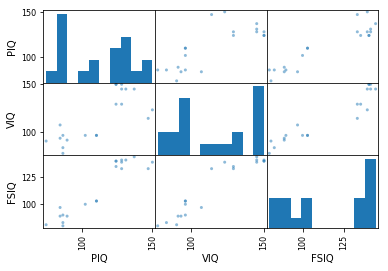

In [196]:
plotting.scatter_matrix(male_data[['PIQ', 'VIQ', 'FSIQ']]) 

**Observation** - Looks like there are two populations in the data. Can one population be assigned to one gender? For this we split the dataset into males and females

/Users/jimpfaendtner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20c4f278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a20fe38d0>]], dtype=object)

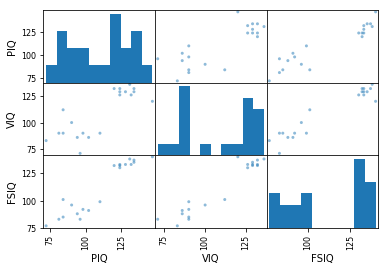

In [197]:
plotting.scatter_matrix(female_data[['PIQ', 'VIQ', 'FSIQ']]) 

**Observation** - Both males and female IQs are spread evenly across both populations. So, visually, it cannot be concluded that fe/males belong to one population or the other

# Hypothesis Testing
We are going to use the scipy.stats package of Python for hypothesis testing
## 1-sample T-test
The t-score is calculated by
t-score = (sampleMean - popMean)/(stdDev/root(N)), where N is the sample size.  
Here, it is the ratio of the difference in sample and population and the differences within the sample. So, larrger t-scores indicate larger differences.  

In [198]:
stats.ttest_1samp(female_data['VIQ'],data['VIQ'].mean())

Ttest_1sampResult(statistic=-0.59846060392264921, pvalue=0.55660059230707548)

In [199]:
stats.ttest_1samp(male_data['VIQ'],data['VIQ'].mean())

Ttest_1sampResult(statistic=0.5057992187427639, pvalue=0.61881547811667326)

**Conclusion** - The value of t-score for both males and females is small meaning that is close to the population mean. Since the p-value is greater 0.05 we can accept the null hypothesis that both mean VIQ of both males and females is from the same population.

In [200]:
stats.ttest_1samp(female_data['VIQ'],0)

Ttest_1sampResult(statistic=22.58672865494281, pvalue=3.4522704912349388e-15)

In [201]:
stats.ttest_1samp(male_data['VIQ'],0)

Ttest_1sampResult(statistic=20.101158606932216, pvalue=2.9056005307137791e-14)

**Conclusion** - We can also test a random value that far from the population mean. We see that teh t-score increases and p-value is << 0.05, so we reject the null hypthesis that the males or females VIQ are derived from a population with mean 0.

## Normality Tests 
When choosing methods to use on your data, the normality of the data can change things: 
1. If data is (nearly) Gaussian, use parametric stats methods
2. Else use non-parametric stats methods  
  
You can also transform data, or remove outliers to make it Gaussian. Data here can refer to -
1. Input data for models
2. Model evaluatin results when comparing models
3. Residual errors from model fitting
  
More on normality tests in Python [here](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/).  

### Visual Normality Tests - Histogram and QQ Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21058dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a212f5828>]], dtype=object)

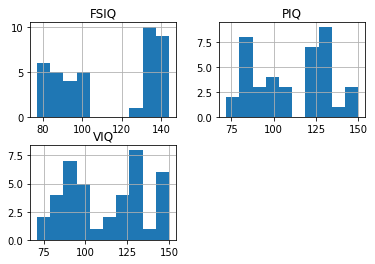

In [202]:
# Histogram
data[['FSIQ','VIQ','PIQ']].hist()

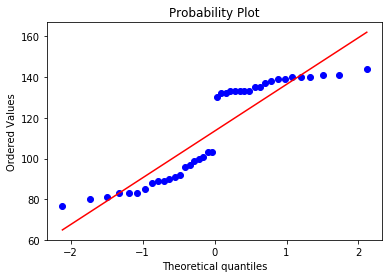

In [203]:
# Quantile-Quantile Plot/ Q-Q plot
# By defauly, prbplot compares to a normal distribution
stats.probplot(data['FSIQ'], plot=plt)
plt.show()

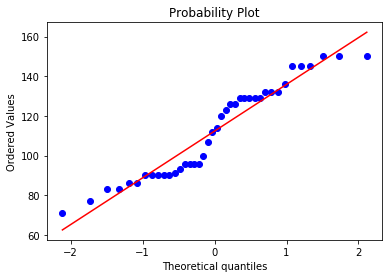

In [204]:
stats.probplot(data['VIQ'], plot=plt)
plt.show()

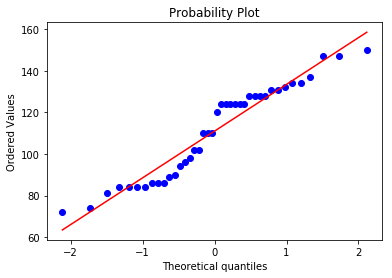

In [205]:
stats.probplot(data['PIQ'], plot=plt)
plt.show()

**Observation** - Visually, from histogram and Q-Q plot, the data does not appear normal. In fact, seems like a Gaussian mixture for PIQ and VIQ like [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html).  

### Statistical Normality  Tests  
We are going to use three types of tests:
1. **Shapiro-wilk Test** - Calculates a W-statistic. Small values of W are evidence of departure from normality. Good for small sample sizes. Like most statistical significance tests, if the sample size is sufficiently large this test may detect even trivial departures from the null hypothesis.  
2. **D’Agostino’s K^2 Test** - Calculates skew and kurtosis (how much of the distribution is found in the tail). Has power only against the alternatives that the distribution is skewed and/or kurtic.
3. **Anderson-Darling Test** - Tests if the data comes from normal, lognormal, weibull or extreme value type I distributions by calculating critical values from each distribution. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test. A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.


Monte Carlo simulation has found that Shapiro–Wilk has the best power for a given significance, followed closely by Anderson–Darling.

In [206]:
# Shapiro-Wilk
print('FSIQ Statistic=%.3f, p=%.3f' 
      % (stats.shapiro(data['FSIQ'])))
print('PIQ Statistic=%.3f, p=%.3f' 
      % (stats.shapiro(data['PIQ'])))
print('VIQ Statistic=%.3f, p=%.3f' 
      % (stats.shapiro(data['VIQ'])))
# p < 0.05, reject null hypothesis 
# that IQs are normally distributed

FSIQ Statistic=0.830, p=0.000
PIQ Statistic=0.928, p=0.014
VIQ Statistic=0.921, p=0.008


In [207]:
# D’Agostino’s K^2 Test
print('FSIQ Statistic=%.3f, p=%.3f' 
      % (stats.normaltest(data['FSIQ'])))
print('PIQ Statistic=%.3f, p=%.3f' 
      % (stats.normaltest(data['PIQ'])))
print('VIQ Statistic=%.3f, p=%.3f' 
      % (stats.normaltest(data['VIQ'])))
# p < 0.05, reject null hypothesis 
# that IQs are normally distributed

FSIQ Statistic=97.179, p=0.000
PIQ Statistic=11.682, p=0.003
VIQ Statistic=14.949, p=0.001


In [208]:
# Anderson-Darling Test
result = stats.anderson(data['FSIQ'])
print('FSIQ Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

FSIQ Statistic: 2.900
15.000: 0.531, data does not look normal (reject H0)
10.000: 0.605, data does not look normal (reject H0)
5.000: 0.726, data does not look normal (reject H0)
2.500: 0.847, data does not look normal (reject H0)
1.000: 1.007, data does not look normal (reject H0)


In [209]:
# Anderson-Darling Test
result = stats.anderson(data['VIQ'])
print('VIQ Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

VIQ Statistic: 1.255
15.000: 0.531, data does not look normal (reject H0)
10.000: 0.605, data does not look normal (reject H0)
5.000: 0.726, data does not look normal (reject H0)
2.500: 0.847, data does not look normal (reject H0)
1.000: 1.007, data does not look normal (reject H0)


In [210]:
# Anderson-Darling Test
result = stats.anderson(data['PIQ'])
print('PIQ Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

PIQ Statistic: 1.198
15.000: 0.531, data does not look normal (reject H0)
10.000: 0.605, data does not look normal (reject H0)
5.000: 0.726, data does not look normal (reject H0)
2.500: 0.847, data does not look normal (reject H0)
1.000: 1.007, data does not look normal (reject H0)


## 2-Sample T-test
There are two types of 2-sample t-tests that we can conduct on data (independent sample when drawing from independent populations, and paired sample when drawing from the same population at different times).  

**Independent 2-sample T-test** - Here, we assume the females and males are independent, so we can do the t-test.

In [211]:
# T-test
stats.ttest_ind(female_data['VIQ'], male_data['VIQ']) 
# Since the t-test assumes that the data
# is normally distributed, this might be inaccurate

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

In [212]:
# Mann-Whitney rank test
# For samples >= 20 - we are just there
stats.mannwhitneyu(female_data['VIQ'], male_data['VIQ']) 
# Does not assume normality/non-parameteric

MannwhitneyuResult(statistic=164.5, pvalue=0.17114434343636575)

**Conclusion** - Since the t-score is very small and Mann-Whitney score is higher, and p-value is > 0.05, we can can accept the null hypothesis that both samples are drawn from the same population. And seeing the scatterplot VIQ distribution, we already saw that males and female IQs were equally distributed and there weren't any notable differences.  
  
**Paired 2-sample T-test** - Some of the variable pairs like FSIQ & VIQ, or FSIQ & PIQ may be correlated or confounding variables. Hence, to ascertain their differences, we can use a paired/repeated measures test.

In [213]:
# Checking if they come from the same distribution
stats.ttest_rel(data['FSIQ'], data['PIQ'])  

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

**Observation** - The t-score is rather small, and p-value is fairly close to the 0.05 threshold, so we can't say that they are different with certainty. But this calculation is the same as a 1-sample T-test on their difference - where the null hypothesis is the ean is zero/or no difference between samples.

In [214]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

Since the t-test assumes Gaussian distribution, and is parametric, we can also use a non-parameteric test like the **Wilcoxon signed-rank test** (for paired or Mann-Whitney U test for independent) which does not assume anything about the underlying assumption.  
  
 **Differences between t-test and wilcoxon test**  -
 1. The Wilcoxon signed rank test is a non-paracontinuous-level test, in contrast to the dependent samples t-tests.  
 2. Whereas the dependent samples t-test tests whether the average difference between two observations is 0, the Wilcoxon test tests whether the difference between two observations has a mean signed rank of 0.  Thus, Wilcoxon is much more robust against outliers and heavy tail distributions.  
 
Because the Wilcoxon sign test is a non-paracontinuous-level test it does not require a special distribution of the dependent variable in the analysis.  Therefore it is the best test to compare mean scores when the dependent variable is not normally distributed and at least of ordinal scale.

In [215]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])   

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

The Wilcoxon test does not test for equality of means, rather it tests
H0:P(Xa>Xb)=0.5
namely that a randomly drawn observation of group a has 50% chance of being larger than a randomly drawn observation from group b. This is very computer-intensive, so usually for such large sample sizes the asymptotic normality of W is used for calculating the p-value
**Conclusion** - FSIQ and PIQ seem to come from the same distribution since higher values of test statistics, and p > 0.05 tells us that this null hypothesis is true

## Final conclusion
1. From **visual (histogram, Q-Q plots) and statistical (Shapiro-wilk, D'Agnostio K^2, and Anderson-Darling) normality tests**, we concluded that the data for IQs was not normal.
2. From **single sample tests**, we saw that the IQs are likely from the same distribution.
3. From **2-sample independent tests** we see that female and male IQs cannot be said to come from different distributions.
4. From **2-sample paired tests** we see that all IQs might be samples from the same distribution.  